# **FGV EESP**

- ## Regressão Linear - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("stargazer")
install.packages("urca")

In [ ]:
library(broom)
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "minimum_wage_increase", "minimum_wage_increase_deflated", "income_increase", "income_increase_deflated", "household_income_deflated", "household_income_deflated_trend", "household_income_deflated_trend_diff", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_trend_diff", "pib", "primary_fiscal_result", "primary_fiscal_result_pct_pib", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_pct_pib_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag", "consumer_confidence_index_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [4]:
str(df_public_data)

'data.frame':	212 obs. of  35 variables:
 $ year                                    : num  2006 2006 2006 2006 2006 ...
 $ month_name                              : Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ month_date                              : Date, format: "2006-01-01" "2006-02-01" ...
 $ month                                   : Time-Series  from 2006 to 2024: 2006 2006 2006 2006 2006 ...
 $ market_inflation_expectation            : Time-Series  from 2006 to 2024: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ consumer_inflation_expectation          : Time-Series  from 2006 to 2024: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ consumer_confidence_index               : Time-Series  from 2006 to 2024: 93.3 92.8 93 91.8 90.7 90.7 91.2 91.8 91.5 94.3 ...
 $ inflation_target                        : Time-Series  from 2006 to 2024: 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 ...
 $ inflation_target_lower_bound            : Time-Series  from 2006 to

## **Modelo Linear**

> #### **Expectativa de Inflação dos Consumidores**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


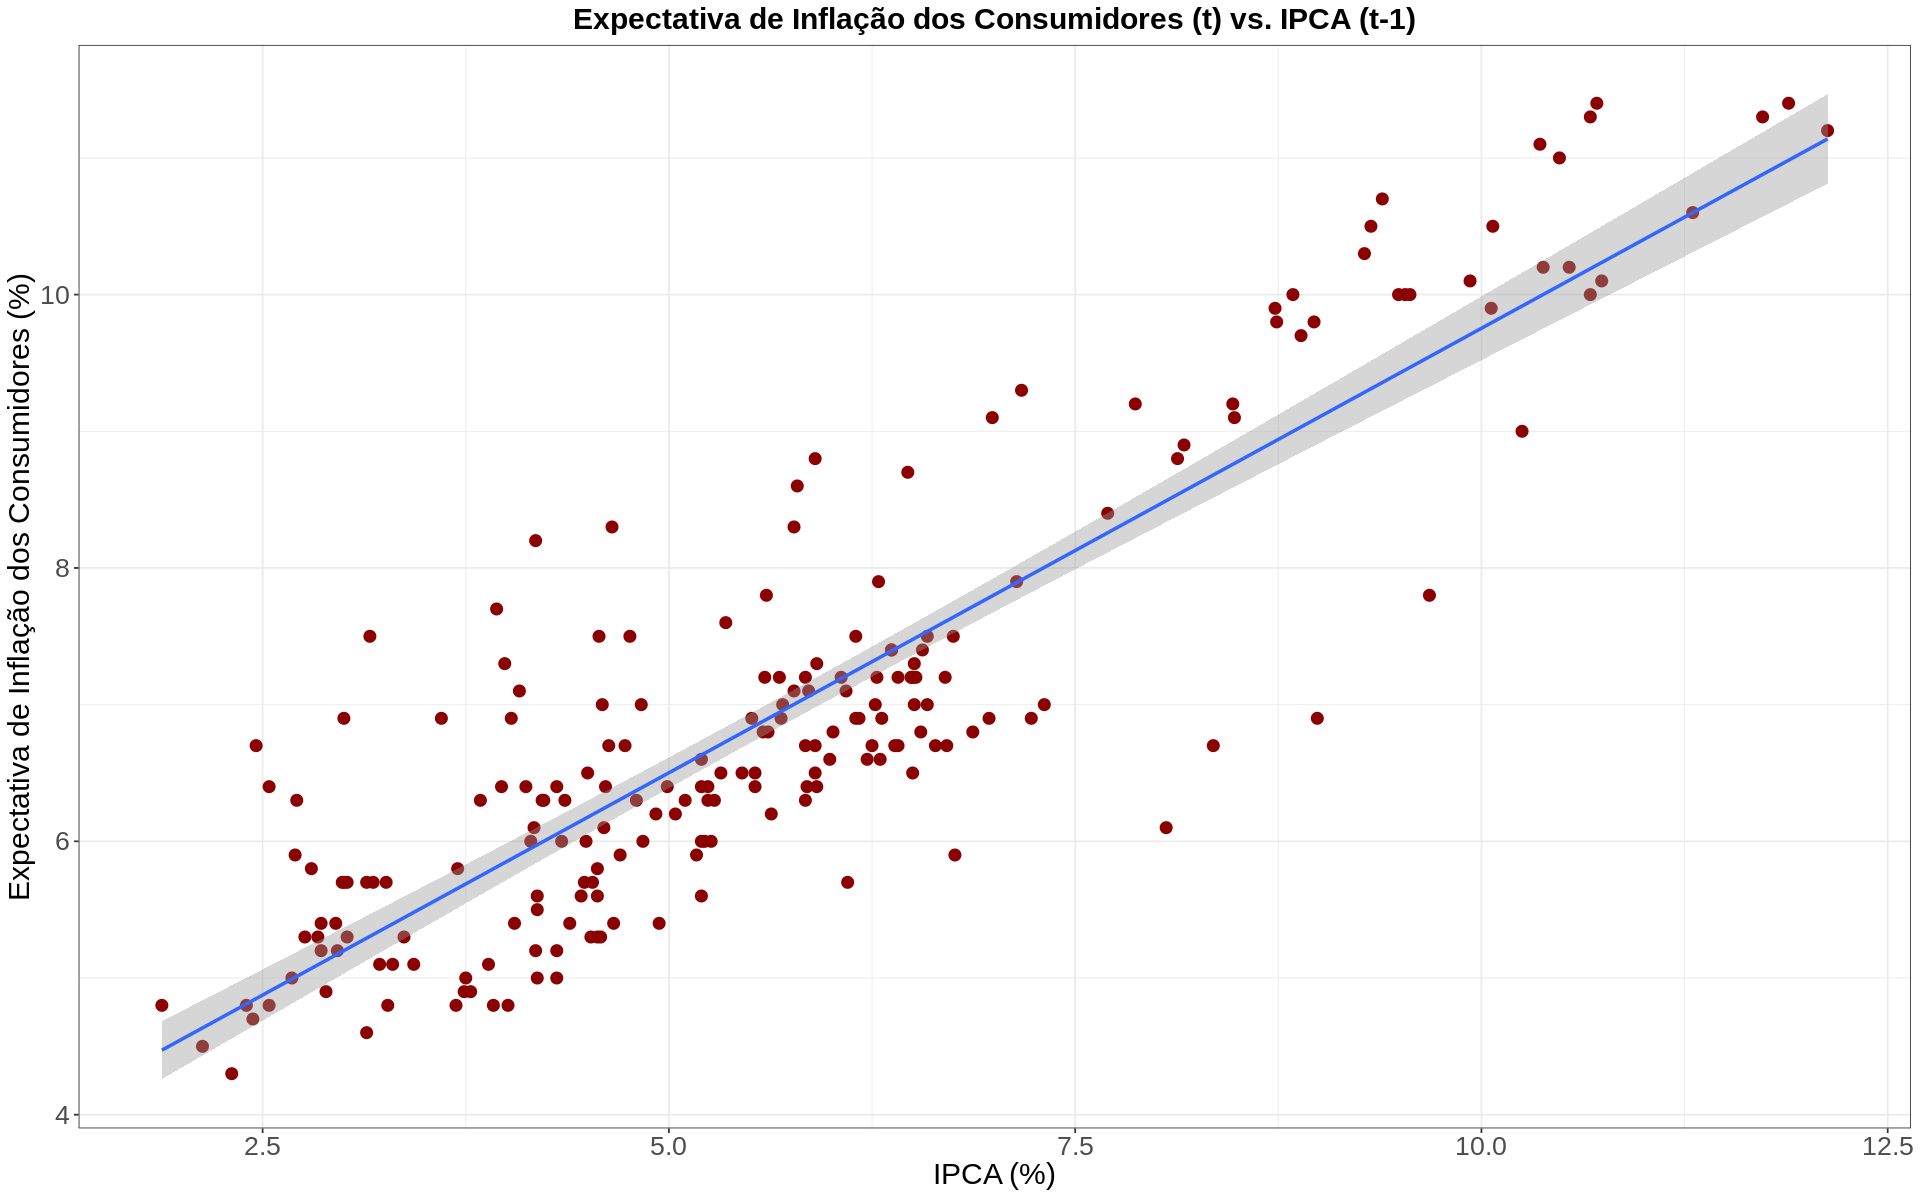

In [5]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = consumer_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação dos Consumidores (%)", title = "Expectativa de Inflação dos Consumidores (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [6]:
# Consumer Inflation Expectation
ols_model_consumer <- lm(consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_consumer)


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3957 -0.3064  0.3806  1.3894  3.8827 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag  1.14524    0.01602   71.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.426 on 211 degrees of freedom
Multiple R-squared:  0.9603,	Adjusted R-squared:  0.9602 
F-statistic:  5110 on 1 and 211 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 95% da expectativa de inflação dos consumidores, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação dos Consumidores (t) varia 1,142%

> #### **Expectativa de Inflação do Mercado**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`geom_smooth()` using formula = 'y ~ x'


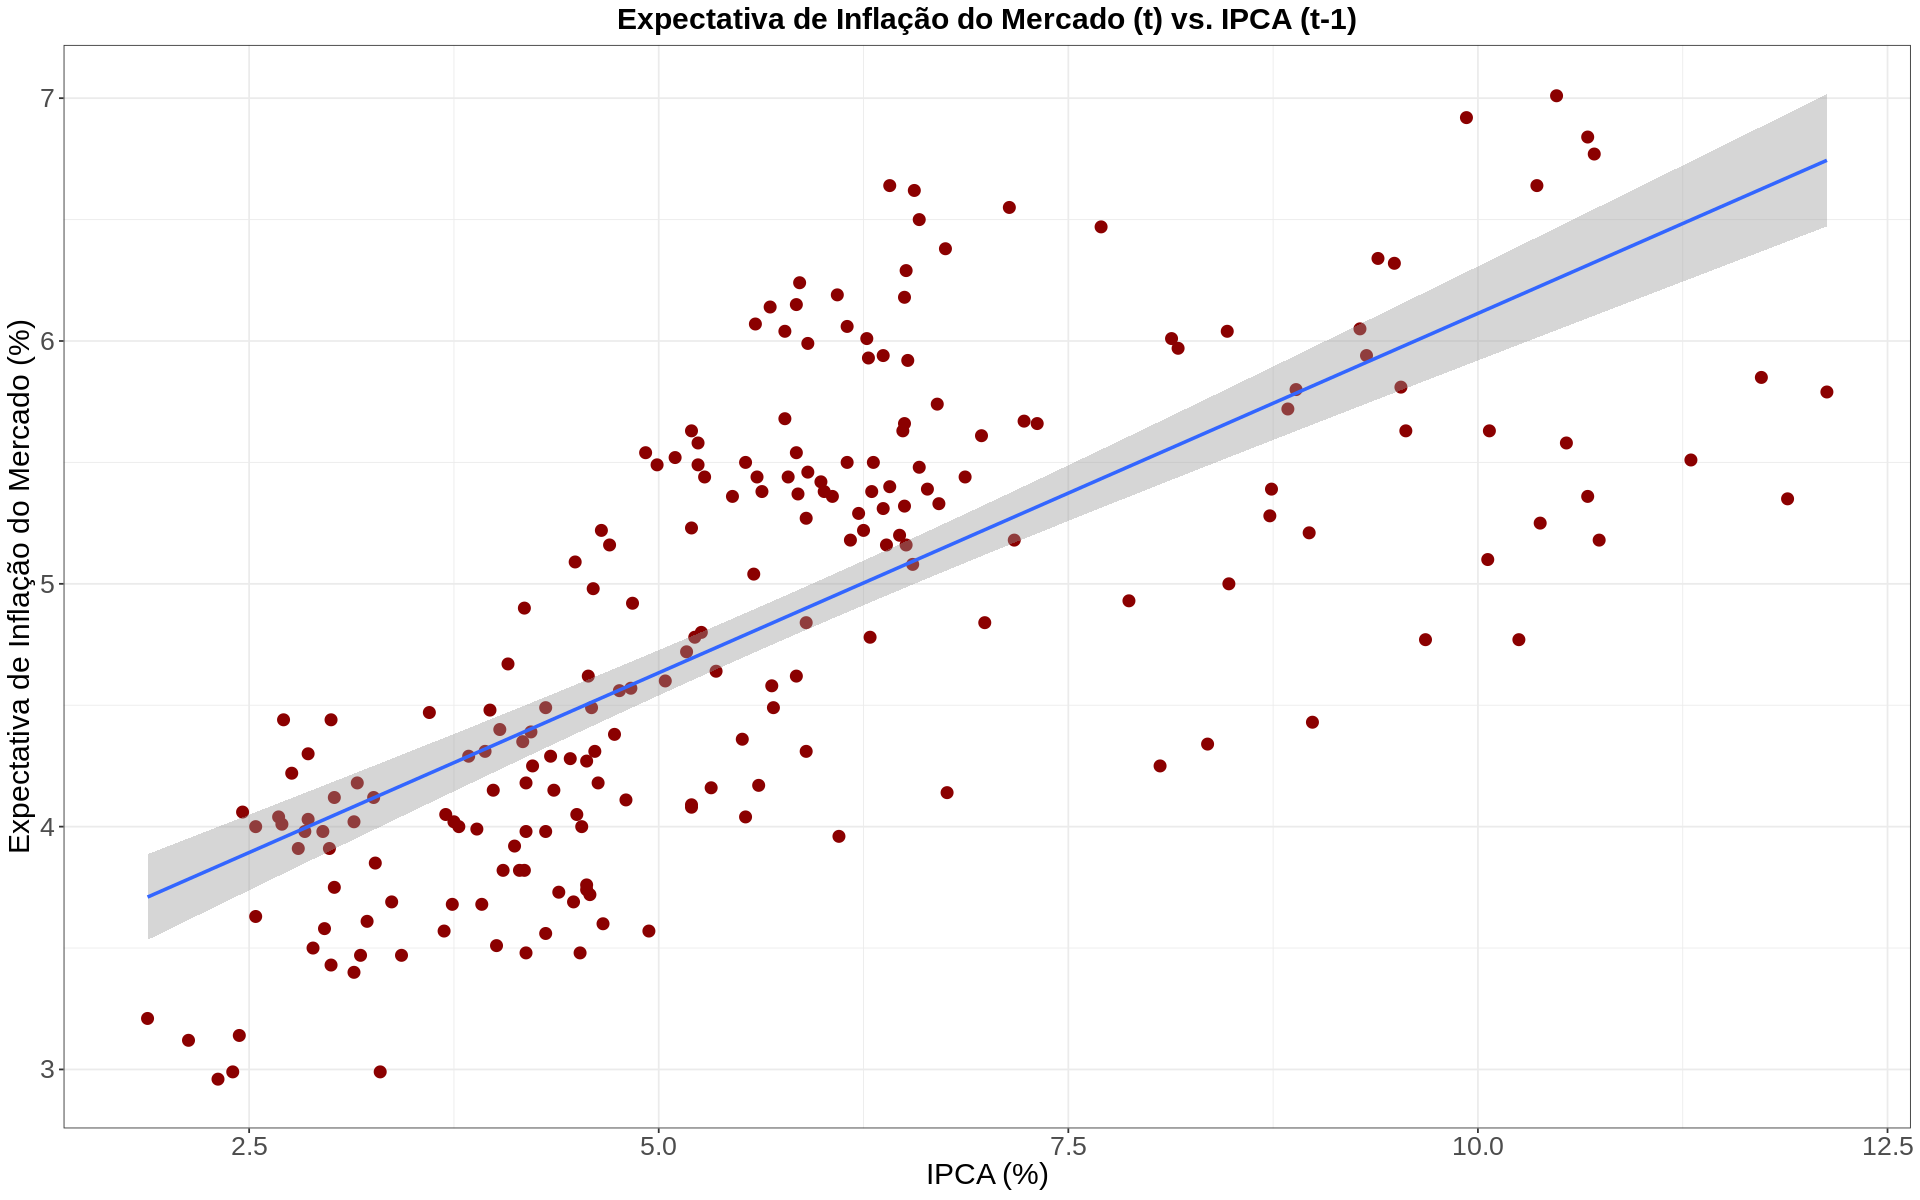

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "market_inflation_expectation" e "ipca_lag" com regressão linear
ggplot(df_public_data, aes(x = ipca_lag, y = market_inflation_expectation)) +
  geom_point(color = "darkred", size = 3) +
  geom_smooth(method = "lm") +
  labs(x = "IPCA (%)", y = "Expectativa de Inflação do Mercado (%)", title = "Expectativa de Inflação do Mercado (t) vs. IPCA (t-1)") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Ano"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [8]:
# Market Inflation Expectation
ols_model_market <- lm(market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

summary(ols_model_market)


Call:
lm(formula = market_inflation_expectation ~ ipca_lag - 1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8794  0.0635  0.7195  1.2474  2.3364 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ipca_lag   0.7762     0.0149   52.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.327 on 211 degrees of freedom
Multiple R-squared:  0.9278,	Adjusted R-squared:  0.9275 
F-statistic:  2713 on 1 and 211 DF,  p-value: < 2.2e-16


**Resultado**

- Apenas a variável IPCA do mês anterior explica mais de 90% da expectativa de inflação do mercado, sendo que para cada 1% de variação do IPCA (t-1) a Expectativa de Inflação do Mercado (t) varia 0,775%

- ## **What Drives Inflation Expectations in Brazil?**

  - [Reference: Cerisola and Gelos, 2005](https://deliverypdf.ssrn.com/delivery.php?ID=036104118122116086077067024116078091086034032080036086072122014051097004041100029065068117004063079032099107022071108126002028083099076095110105025105074097124114030006099029119113&EXT=pdf&INDEX=TRUE)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


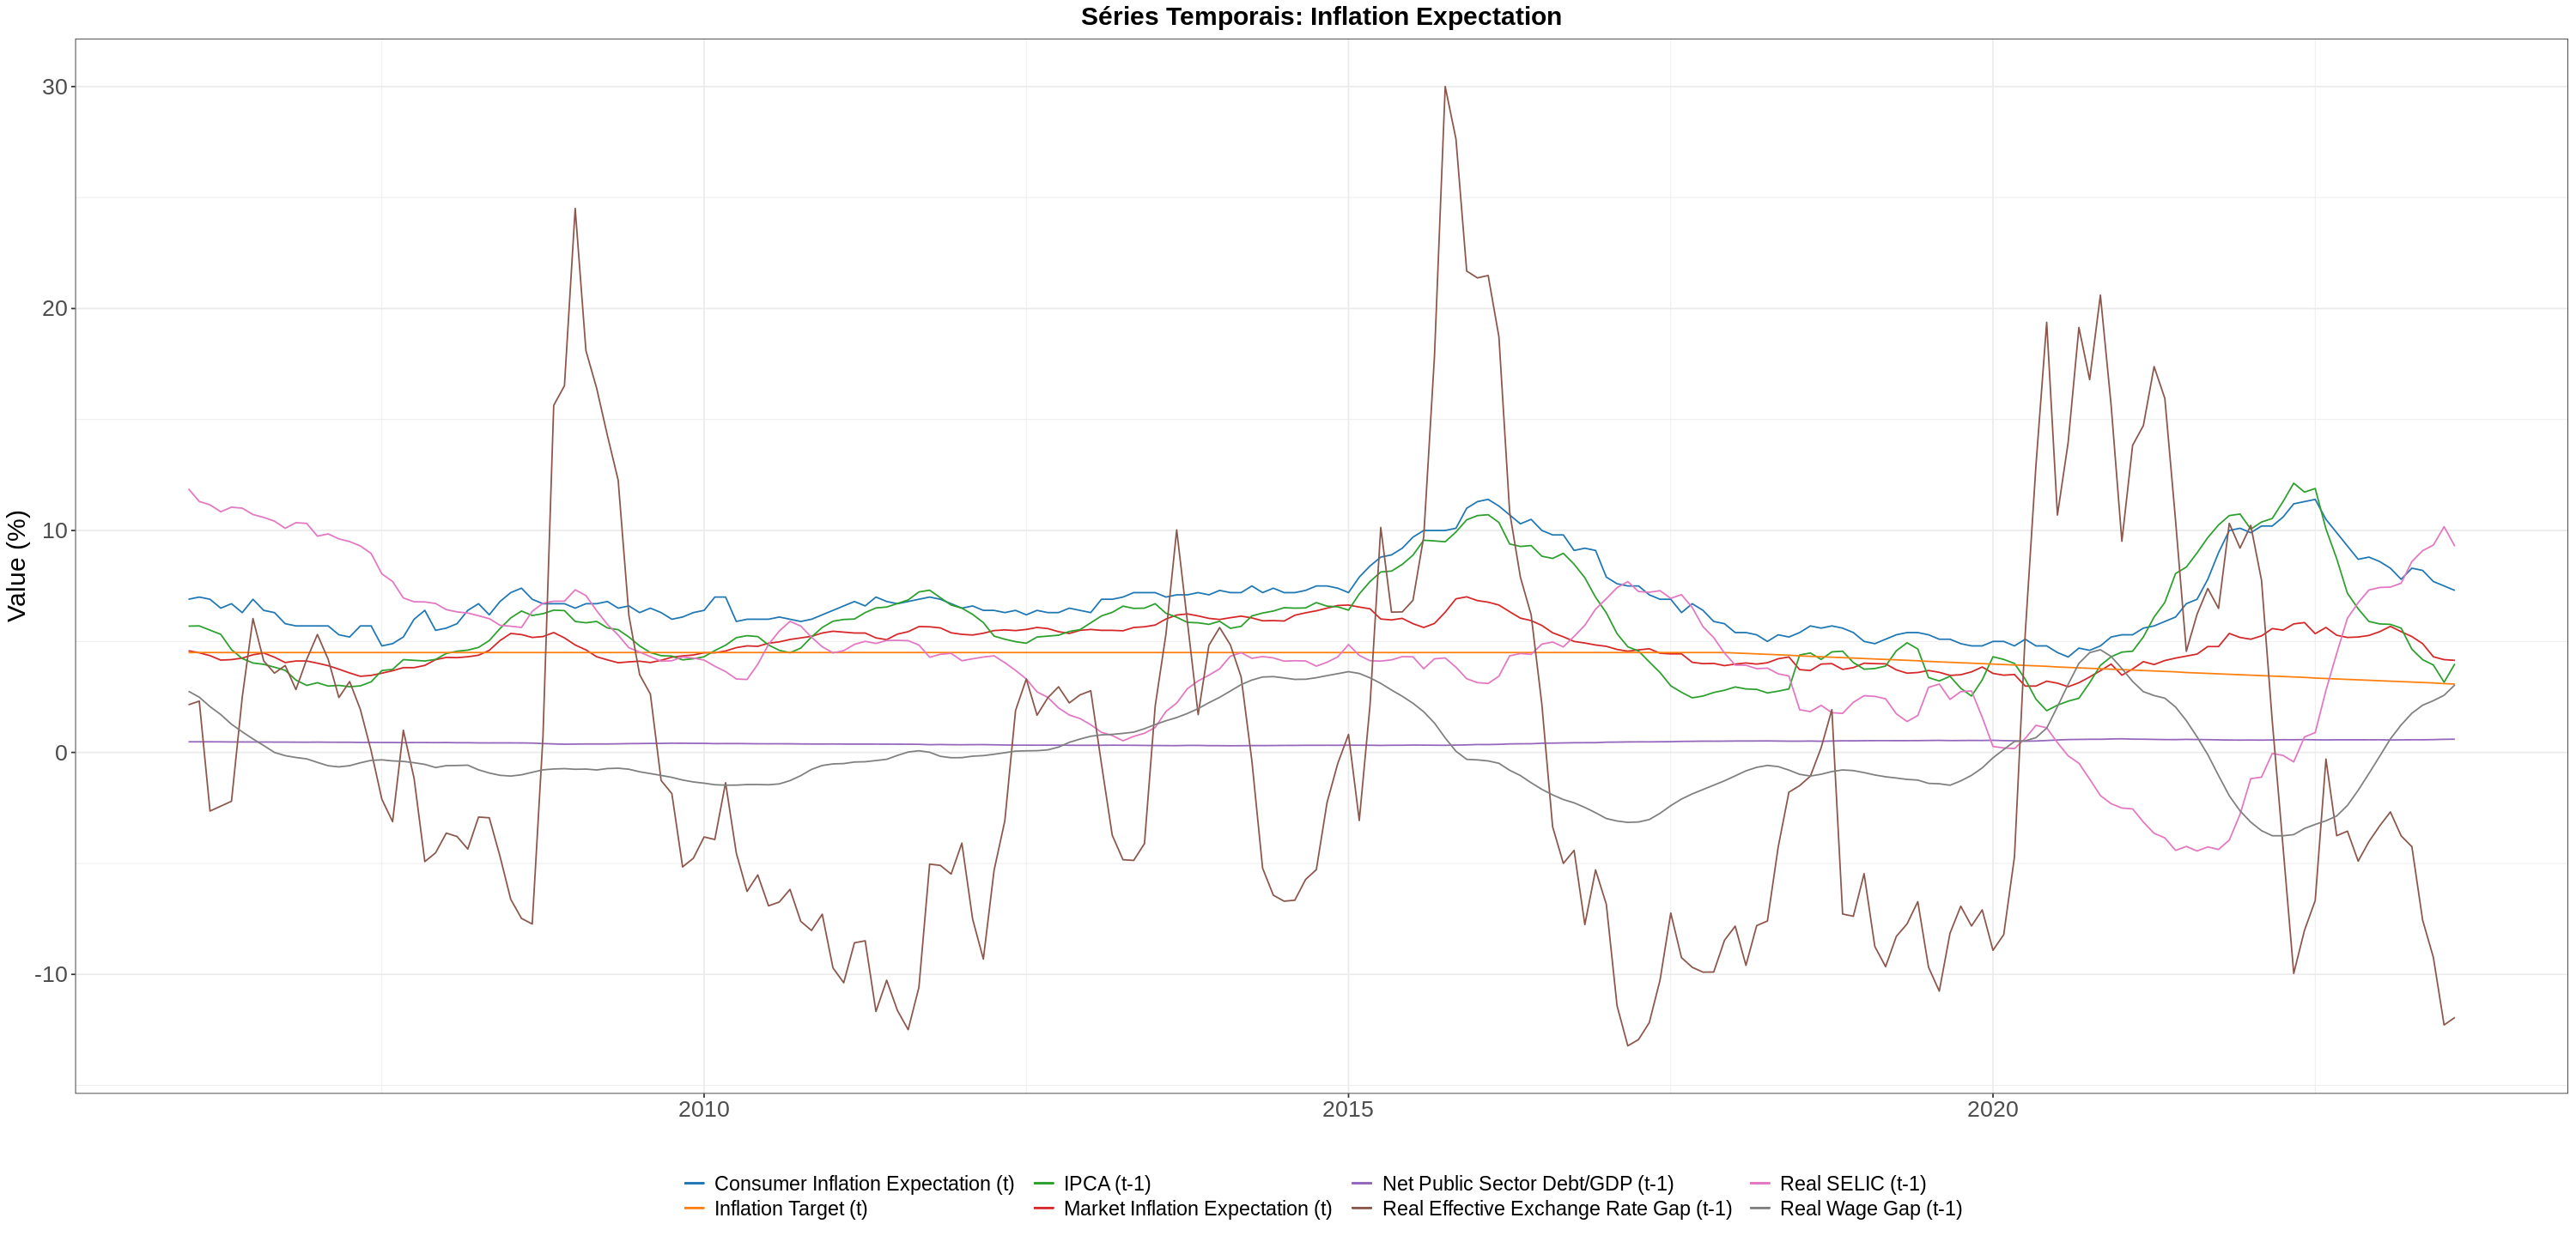

In [9]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 25, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(df_public_data) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = ipca_lag, color = "IPCA (t-1)")) +
  geom_line(aes(x = month, y = inflation_target_wtd_avg, color = "Inflation Target (t)")) +
  geom_line(aes(x = month, y = primary_fiscal_result_pct_pib_lag, color = "Net Public Sector Debt/GDP (t-1)")) +
  geom_line(aes(x = month, y = selic_deflated_lag, color = "Real SELIC (t-1)")) +
  geom_line(aes(x = month, y = real_exchange_rate_trend_diff_lag, color = "Real Effective Exchange Rate Gap (t-1)")) +
  geom_line(aes(x = month, y = household_income_deflated_trend_diff_lag, color = "Real Wage Gap (t-1)")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Regressão Linear Múltipla**

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{inflation_expectation}_t
&= \alpha_1 \cdot \text{IPCA}_{t-1} \\
&+ \alpha_2 \cdot \text{Inflation Target}_{t} \\
&+ \alpha_3 \cdot \text{Net Public Sector Debt/GDP}_{t-1} \\
&+ \alpha_4 \cdot \text{Real SELIC}_{t-1} \\
&+ \alpha_5 \cdot \text{Real Effective Exchange Rate Gap}_{t-1} \\
&+ \alpha_6 \cdot \text{Real Wage Gap}_{t-1} \\
&+ ɛ_i
\end{align*}

> **Teste de hipótese para cada ${\alpha_n}$ com $n = [1,6]$**

  - ${H}_0: \alpha_n = 0$
  - ${H}_a: \alpha_n \neq 0$

> **Nível de significância**

- **β** = 5%

> **Modelo econométrico**

In [10]:
consumer_linear_model = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 1,
    data = df_public_data)

market_linear_model = lm(market_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 1,
    data = df_public_data)

In [11]:
summary( consumer_linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 
    1, data = df_public_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5739 -0.4215  0.0519  0.4472  1.6348 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
ipca_lag                                  0.762317   0.020633  36.946  < 2e-16
inflation_target_wtd_avg                  0.142655   0.051804   2.754  0.00642
primary_fiscal_result_pct_pib_lag         2.981546   0.358307   8.321 1.19e-14
selic_deflated_lag                        0.163173   0.014848  10.990  < 2e-16
real_exchange_rate_trend_diff_lag         0.003654   0.005639   0.648  0.51770
household_income_deflated_trend_diff_lag -0.012926   0.026346  -0.491  0.62420
                                            
ipca_lag                 

**Resultado**

- A variável `real_exchange_rate_trend_diff_lag` e `household_income_deflated_trend_diff_lag` não são estatisticamente significativas dado o nível de significância β escolhido, enquanto que as outras variáveis são estatisticamente significativas.

In [12]:
summary( market_linear_model )


Call:
lm(formula = market_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    real_exchange_rate_trend_diff_lag + household_income_deflated_trend_diff_lag - 
    1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23009 -0.33041  0.02266  0.27564  1.41687 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
ipca_lag                                  0.377340   0.015534  24.292  < 2e-16
inflation_target_wtd_avg                  0.704032   0.039000  18.052  < 2e-16
primary_fiscal_result_pct_pib_lag        -1.078193   0.269748  -3.997 8.93e-05
selic_deflated_lag                        0.037467   0.011178   3.352 0.000955
real_exchange_rate_trend_diff_lag        -0.020526   0.004245  -4.835 2.60e-06
household_income_deflated_trend_diff_lag  0.159548   0.019834   8.044 6.76e-14
                                            
ipca_lag         

In [13]:
tidy( market_linear_model )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.37734001,0.015533555,24.291928,2.175494e-62
inflation_target_wtd_avg,0.70403212,0.039000250,18.051990,2.627497e-44
primary_fiscal_result_pct_pib_lag,-1.07819278,0.269748042,-3.997037,8.932147e-05
selic_deflated_lag,0.03746693,0.011178218,3.351780,9.552310e-04
real_exchange_rate_trend_diff_lag,-0.02052592,0.004245175,-4.835118,2.600090e-06
household_income_deflated_trend_diff_lag,0.15954799,0.019834476,8.043973,6.760339e-14


**Resultado**

- Todas as variáveis são estatisticamente significativas dado o nível de significância β escolhido.

> **Modelo econométrico apenas com variáveis estatisticamente significativas**

- Adição de variável Confiança do Consumidor em t-1

In [14]:
consumer_linear_model_adjusted = lm(consumer_inflation_expectation ~
    ipca_lag + inflation_target_wtd_avg + primary_fiscal_result_pct_pib_lag + selic_deflated_lag + consumer_confidence_index_lag - 1,
    data = df_public_data)

In [15]:
summary( consumer_linear_model_adjusted )


Call:
lm(formula = consumer_inflation_expectation ~ ipca_lag + inflation_target_wtd_avg + 
    primary_fiscal_result_pct_pib_lag + selic_deflated_lag + 
    consumer_confidence_index_lag - 1, data = df_public_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60096 -0.40636  0.05886  0.47681  1.56254 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
ipca_lag                           0.756197   0.019429  38.921  < 2e-16 ***
inflation_target_wtd_avg           0.386766   0.089682   4.313  2.5e-05 ***
primary_fiscal_result_pct_pib_lag  3.271202   0.354037   9.240  < 2e-16 ***
selic_deflated_lag                 0.163891   0.014064  11.653  < 2e-16 ***
consumer_confidence_index_lag     -0.012624   0.003801  -3.321  0.00106 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6249 on 207 degrees of freedom
Multiple R-squared:  0.9925,	Adjusted R-squared:  0.9924 
F-statistic:  5502 on 5 a

In [16]:
tidy( consumer_linear_model_adjusted )

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ipca_lag,0.75619669,0.019429007,38.921016,3.535842e-97
inflation_target_wtd_avg,0.38676649,0.089682148,4.312636,2.496072e-05
primary_fiscal_result_pct_pib_lag,3.27120177,0.354037243,9.239711,3.050540e-17
selic_deflated_lag,0.16389119,0.014063891,11.653332,1.851724e-24
consumer_confidence_index_lag,-0.01262435,0.003801266,-3.321091,1.059824e-03


> ### **Distribuição dos Resíduos**

In [17]:
consumer_residuals <- residuals(consumer_linear_model_adjusted)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [18]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 212 0.01   0.62   -1.60 1.56
--------------------------------------


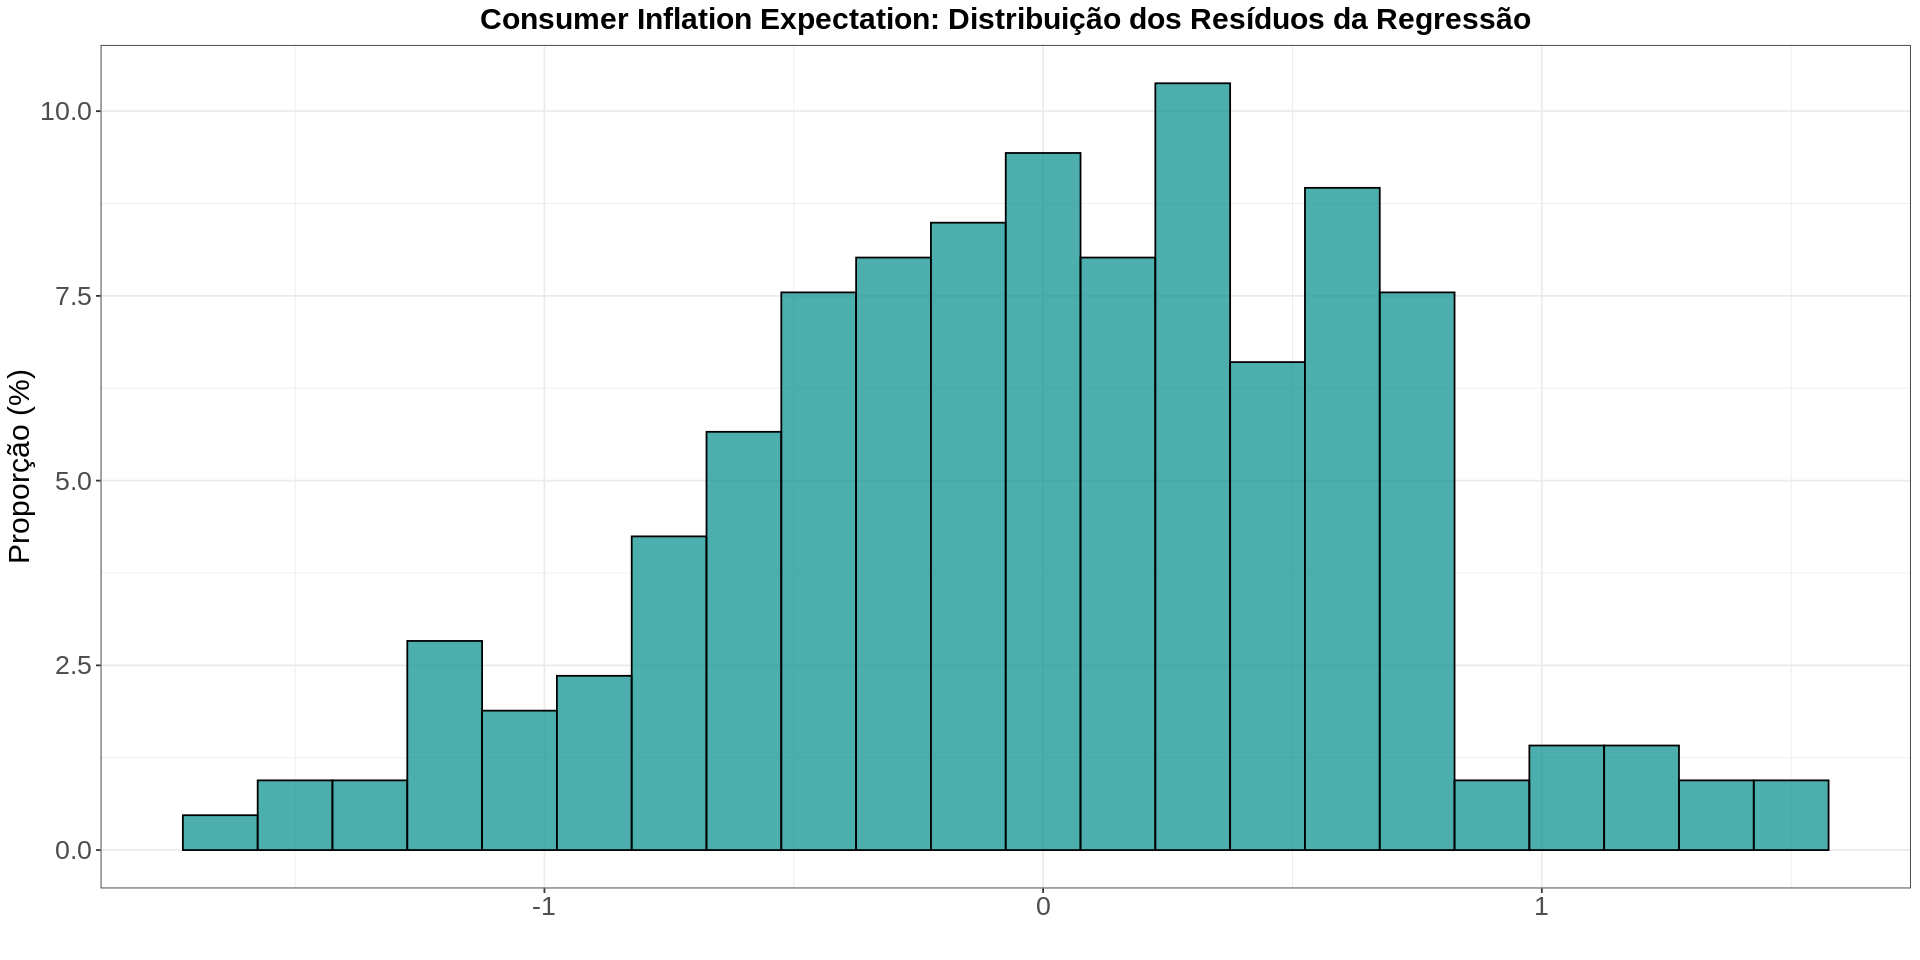

In [19]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [20]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N  Mean St. Dev.  Min  Max 
--------------------------------------
residuals 212 0.01   0.48   -1.23 1.42
--------------------------------------


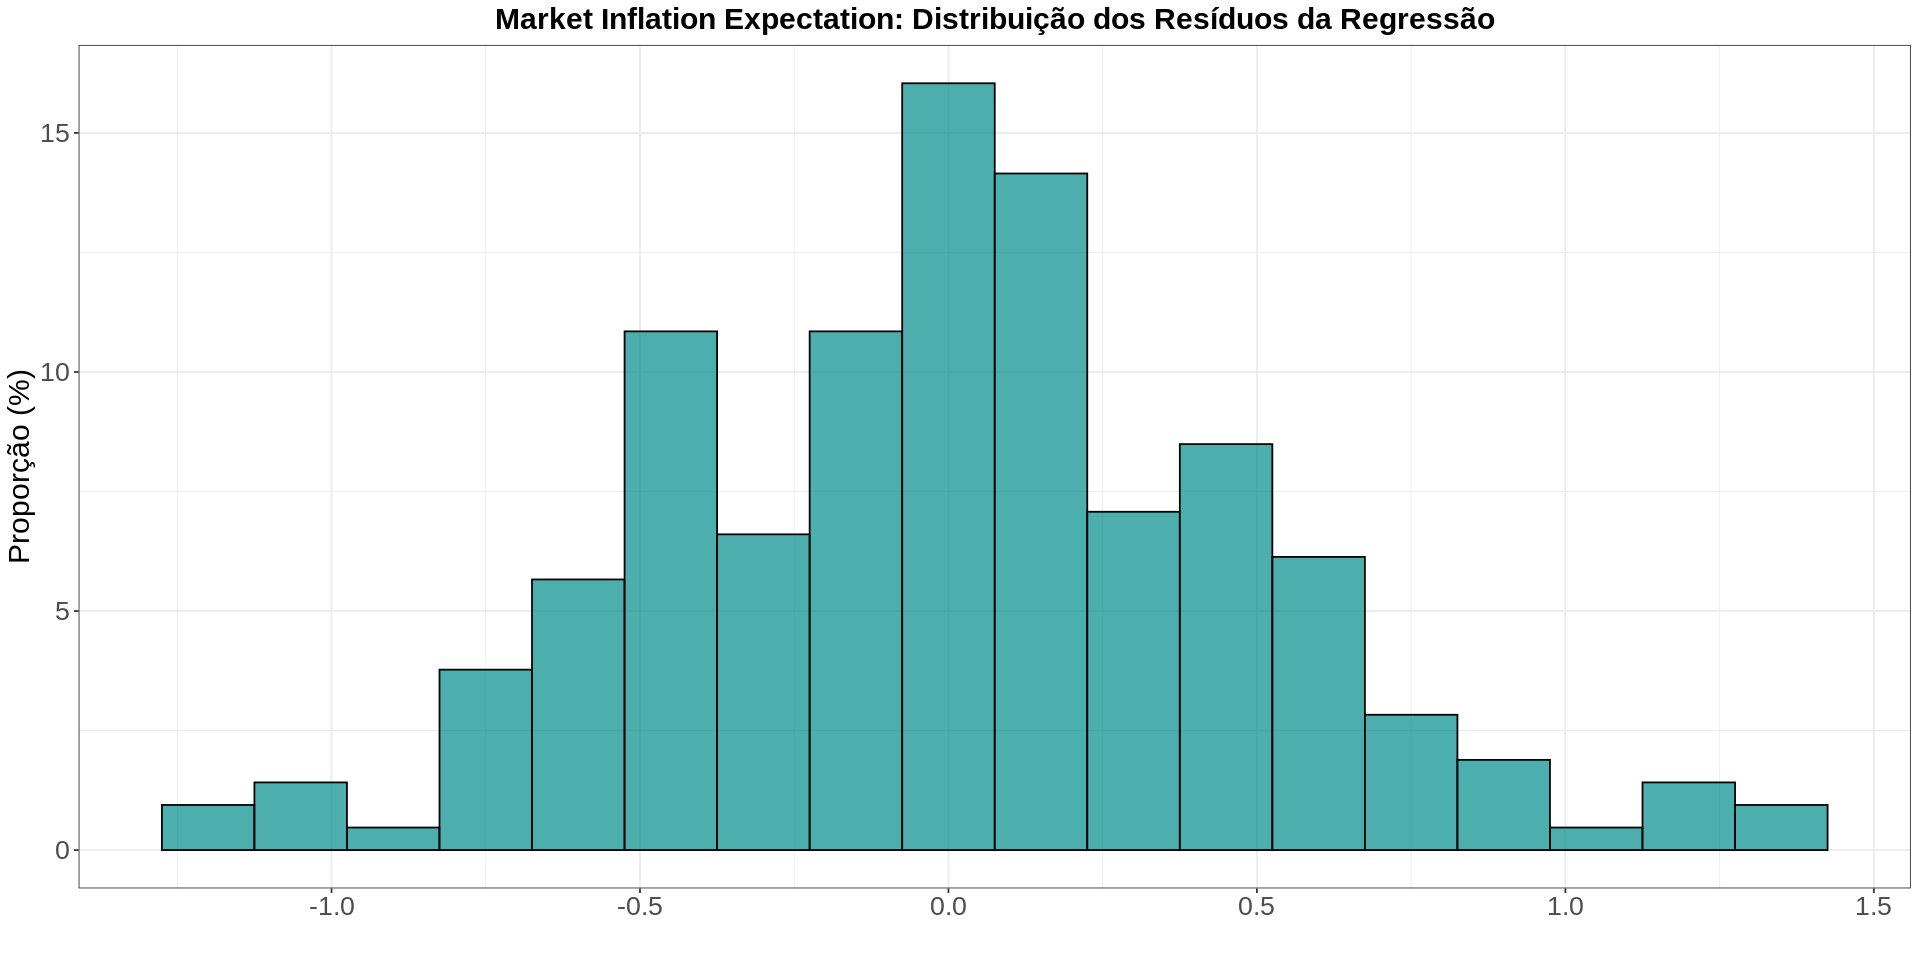

In [21]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

> ### **Estacionariedade dos Resíduos**

> **ADF (Augmented Dickey-Fuller)**

- Nível de Significância
  * α = 5%

- Testes de Hipótese
  * **tau3**
    * Hipótese nula: possui raiz unitária
  * **phi2**
    * Hipótese nula: possui raiz unitária, sem tendência e sem drift
  * **phi3**
    * Hipótese nula: possui raiz unitária e sem tendência

In [22]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04370 -0.17149  0.00174  0.18931  1.03806 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0500209  0.0522049  -0.958  0.33924   
z.lag.1      -0.1866733  0.0607723  -3.072  0.00245 **
tt            0.0005654  0.0004209   1.343  0.18078   
z.diff.lag1   0.0227950  0.0830097   0.275  0.78393   
z.diff.lag2   0.0054085  0.0823429   0.066  0.94770   
z.diff.lag3   0.0694152  0.0820451   0.846  0.39862   
z.diff.lag4  -0.0111998  0.0812682  -0.138  0.89054   
z.diff.lag5   0.1056631  0.0805868   1.311  0.19143   
z.diff.lag6   0.0499592  0.0803704   0.622  0.53497   
z.diff.lag7   0.0420565  0.0782511   0.537  0.59160   
z.diff.lag8  -0.0381172  0.0781390  -0.488 

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [23]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98882 -0.10067 -0.00523  0.10779  0.92602 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0185101  0.0370951  -0.499  0.61838   
z.lag.1      -0.1575840  0.0661894  -2.381  0.01830 * 
tt            0.0002709  0.0002978   0.910  0.36415   
z.diff.lag1   0.2005410  0.0870076   2.305  0.02229 * 
z.diff.lag2  -0.0538225  0.0874221  -0.616  0.53888   
z.diff.lag3   0.0505259  0.0852724   0.593  0.55423   
z.diff.lag4  -0.0292553  0.0858477  -0.341  0.73366   
z.diff.lag5  -0.0691456  0.0819812  -0.843  0.40008   
z.diff.lag6  -0.0272541  0.0796578  -0.342  0.73264   
z.diff.lag7  -0.1322177  0.0774899  -1.706  0.08965 . 
z.diff.lag8  -0.1745177  0.0754968  -2.312 

#### **Resultado**

- Como os valores de test-statistic são menores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, não se rejeita as hipóteses nulas, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

> **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

- Nível de Significância
  * α = 5%

- Teste de Hipótese
  * $H_0$: não possui raiz unitária

In [24]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2526 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.

In [25]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2104 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como o valor de test-statistic é maior que o valor crítico para um nível de significância de 5%, rejeita-se a hipótese nula, ou seja, os resíduos possuem raiz unitária, o que implica que os resíduos não são estacionários.